# COGS 108 - Rates of Rape and City Spending 

# Overview

We looked at the relationship between rates of rape and transportation, public safety, and environment & housing spending by large cities with populations over 250,000 in the U.S from 1977-2015. We grouped the data for the cities by the mean to mitigate the time factor and performed linear regression to find the relationship between the proportion of general spending on these three categories and rates of rape. Ultimately, we did not find a relationship using the proportion of spending on these three categories combined nor did we find a relationship using the proportion of spending on these three categories individually.

# Names

- Kyle Moore
- Harshini Ramaswamy
- Christina Ryder
- Jennifer Vo

<a id='research_question'></a>
# Research Question

Is there a relationship between rates of rape and transportation, public safety, environment, housing, and infrastructure spending by large cities with populations over 250,000 in the U.S from 1977-2015?

<a id='background'></a>

## Background & Prior Work

A study carried out by the UK Department of Transport 
[(2002)](https://www.google.com/books/edition/Research_on_Women_s_Issues_in_Transporta/nbtAJRvBaWsC?hl=en&gbpv=1&dq=sexual+assault+public+transport&pg=PA100&printsec=frontcover) found that women were more likely than men to experience sexual assault, harassment, or indecent exposure in public transportation spaces. Moreover, a survey conducted in 3 cities in Argentina, Chile, and Ecuador found that fear of being harassed was reported most frequently as the greatest concern for public transport users, the majority being women [(Allen et al., 2018)](https://scioteca.caf.com/bitstream/handle/123456789/1407/Ella%20se%20mueve%20segura%20%E2%80%93%20A%20study%20on%20womens%20personal%20safety.pdf?sequence=5&isAllowed=y). 

Unsafe public transportation spaces can deter use, limit mobility and access to economic and educational opportunities, and force individuals to compromise personal safety. Fear of using public transportation can influence choice of route, travel patterns, and potentially lead to complete avoidance of public spaces deemed unsafe [(Gekoski et al., 2017)](https://www.emerald.com/insight/content/doi/10.1108/JCRPP-08-2016-0016/full/html?utm_source=miragenews&utm_medium=miragenews&utm_campaign=news). The UK Department of Transport (2002) estimated that 10.5% more journeys would occur if the public felt more secure while traveling.

These same worries transfer over to public spaces in general [(Fraser et al., 2017)](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/620485/Infrastructure-Cities-briefing-note.pdf). Parks, public squares, recreational facilities, and night life also have their own causes for concern for women. Allen et al., (2018) propose that investing in inclusive, well-planned public spaces, infrastructure, urban services, and transport could reduce instances of sexual violence and harassment experienced in public spaces. Analyzing how cities are addressing these problems by examining where their spending is concentrated, as well as any correlation between spending and rates of assault, could provide a framework and direction for what is working and what isn’t. There hasn’t been much research on how city spending on infrastructure and public safety connects with ensuring women’s safety, so it is an interesting and important topic to us.

Though there is little empirical literature available to understand the link between public transit investment and preventing sexual assault cases, some smaller scale studies have investigated sexual assault prevention initiatives in other public spaces. Day [(1995)](https://doi.org/10.1006/jevp.1995.0024) examined prevention on urban college campuses and strategies at both the individual and school level. She emphasized the efficacy of community engagement in raising awareness about sexual assault and how most of the schools’ approaches included expanding public transportation and increased security on campus.

In this study, we plan to examine how community investment, such as in housing and infrastructure, is addressed by city spending and how this has impacted rates of sexual violence. Additionally, we intend to explore and quantify the impact of investing in public safety and transportation on the instances of sexual violence and harassment reported over the last two decades.


References:

1. https://www.google.com/books/edition/Research_on_Women_s_Issues_in_Transporta/nbtAJRvBaWsC?hl=en&gbpv=1&dq=sexual+assault+public+transport&pg=PA100&printsec=frontcover

2. https://scioteca.caf.com/bitstream/handle/123456789/1407/Ella%20se%20mueve%20segura%20%E2%80%93%20A%20study%20on%20womens%20personal%20safety.pdf?sequence=5&isAllowed=y

3. https://emerald.com/insight/content/doi/10.1108/JCRPP-08-2016-0016/full/html?utm_source=miragenews&utm_medium=miragenews&utm_campaign=news

4. https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/620485/Infrastructure-Cities-briefing-note.pdf 

5. https://doi.org/10.1006/jevp.1995.0024

6. http://genderedinnovations.stanford.edu/case-studies/transportation.html#tabs-2

# Hypothesis


We hypothesize that high rates of reported sexual assault cases are associated with less spending by cities on public safety, environment, housing, infrastructure, and public transportation. This hypothesis follows from previous research that suggests that community investment in public safety, environment, housing, infrastructure, and transportation may reduce sexual violence.

# Dataset(s)

- Dataset Name: Crime in Context, 1975-2015
- Link to the dataset: https://www.kaggle.com/marshallproject/crime-rates
- Number of observations (original dataset): 2829

This dataset is a collection of 40 years of data (1975-2015) on four major types of violent crimes in police jurisdictions with populations 250,000 and greater in the U.S. as of when the data were published in 2016. 

- Dataset Name: Complete Dataset for Fiscally Standardized Cities
- Link to the dataset: https://www.lincolninst.edu/research-data/data-toolkits/fiscally-standardized-cities/search-database
- Number of observations (original dataset): 8938

This dataset is a collection of 40 years (1977-2017) worth of information from the U.S. Census Bureau. It lists major metropolitan cities and provides information on population totals, city spending by department, and revenue by department. 

We will combine these two data sets based on matching year and city_name so that the crime data and expenditure data for one city in one year will be its own observation.

# Setup

In [1]:
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=1.5)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# import pandas and numpy
import pandas as pd
import numpy as np

import patsy
import statsmodels.api as sm

#import sklearn for random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

#improve resolution
%config InlineBackend.figure_format ='retina'

# Data Cleaning

The data is in a usable, tabular format (i.e. observations in rows, variables in columns). Observations have been reported in a standardized way and column headings are informative and appropriate. 

We did not have to get the data into a usable format. Both datasets already had observations organized in rows and variables in columns in a tabular format. The column names were also relatively short and readable, and appropriate for understanding the data organized under each column so no changes had to be made to the column names. We also checked the type of observations within the same column(e.g. Int, boolean) and they were all consistent. Additionally, the information within each column was already reported in a standardized way with no varying units(e.g. as a total or as a proportion). 

We filtered observations related to the variables of interest(city names, years, spending allocated for department of transportation, rape rates, population) from both datasets. Both datasets also included data from different time periods, so we excluded any data before 1977 and after 2015 in both datasets. Additionally, the datasets stored the city names differently(e.g. Anchorage, AK for the crime dataset vs. AK: Anchorage for the fiscal data set) so we standardized the city names to follow the same format (City, State), before merging the two datasets. We also selectively kept the cities that were reported about in both datasets. We checked for any missing values related to the current variables we are studying and excluded cities where there was no data for population totals, rape case totals, and transportation spending. We kept variables such as crimes per capita, rapes per capita, general and direct spending, public safety spending, and environmental and housing spending to potentially include in our analysis later on. 

In [2]:
# Read in Crime data
crime = pd.read_csv('report.csv')
crime.shape

(2829, 15)

In [3]:
# Read in Fiscal data
fiscal = pd.read_csv('Data-Table 1.csv')
fiscal.shape

(8938, 663)

In [4]:
# Crime table
crime.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


In [5]:
# Fiscal table
fiscal.head()

,year,city_name,city_types,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,...,cash_other_offsets,cash_other_bonds,cash_other_other,county_name,id_county,county_population,relationship_city_school,enrollment,districts_in_city,consolidated_govt
0,1977,AK: Anchorage,core,22002001,174500,4.044885,5342.24,4956.92,2148.77,279.32,...,178.51,787.93,691.32,NaN,NaN,NaN,4.0,36855.0,NaN,1.0
1,1978,AK: Anchorage,core,22002001,177000,3.759509,5948.99,5490.05,2468.11,403.24,...,187.53,1395.82,1158.01,NaN,NaN,NaN,4.0,36804.0,NaN,1.0
2,1979,AK: Anchorage,core,22002001,179600,3.376308,6158.68,5746.64,2573.34,496.97,...,249.03,1812.04,1314.62,NaN,NaN,NaN,4.0,36757.0,NaN,1.0
3,1980,AK: Anchorage,core,22002001,178800,2.974757,5654.93,5210.77,2313.62,371.46,...,986.73,1330.72,1572.66,NaN,NaN,NaN,4.0,36008.0,NaN,1.0
4,1981,AK: Anchorage,core,22002001,174431,2.696590,6192.83,5736.81,2771.43,338.76,...,977.32,1549.51,1669.55,NaN,NaN,NaN,4.0,34557.0,NaN,1.0


In [6]:
# Select the relevant columns to analyze
crime = crime[['report_year','agency_jurisdiction', 'population', 'violent_crimes', 'rapes','crimes_percapita','rapes_percapita']]
crime.head()

,report_year,agency_jurisdiction,population,violent_crimes,rapes,crimes_percapita,rapes_percapita
0,1975,"Albuquerque, NM",286238.0,2383.0,181.0,832.52,63.23
1,1975,"Arlington, TX",112478.0,278.0,28.0,247.16,24.89
2,1975,"Atlanta, GA",490584.0,8033.0,443.0,1637.44,90.30
3,1975,"Aurora, CO",116656.0,611.0,44.0,523.76,37.72
4,1975,"Austin, TX",300400.0,1215.0,190.0,404.46,63.25


In [7]:
# Check for columns with missing values
crime.isna().any()

report_year            False
agency_jurisdiction    False
population              True
violent_crimes          True
rapes                   True
crimes_percapita        True
rapes_percapita         True
dtype: bool

In [8]:
# Check which observations have missing values for the 'rapes' variable
crime[crime['rapes'].isnull()]

,report_year,agency_jurisdiction,population,violent_crimes,rapes,crimes_percapita,rapes_percapita
30,1975,"Louisville, KY",NaN,NaN,NaN,NaN,NaN
68,1975,United States,NaN,1039710.0,NaN,487.8,NaN
99,1976,"Louisville, KY",NaN,NaN,NaN,NaN,NaN
137,1976,United States,NaN,1004210.0,NaN,467.8,NaN
168,1977,"Louisville, KY",NaN,NaN,NaN,NaN,NaN
206,1977,United States,NaN,1029580.0,NaN,475.9,NaN
237,1978,"Louisville, KY",NaN,NaN,NaN,NaN,NaN
275,1978,United States,NaN,1085550.0,NaN,497.8,NaN
306,1979,"Louisville, KY",NaN,NaN,NaN,NaN,NaN
344,1979,United States,NaN,1208030.0,NaN,548.9,NaN


In [9]:
# Drop observations with missing data for 'population', 'rapes', 'rapes_percapita'
crime = crime.dropna(subset = ['population', 'rapes', 'rapes_percapita'])
crime

,report_year,agency_jurisdiction,population,violent_crimes,rapes,crimes_percapita,rapes_percapita
0,1975,"Albuquerque, NM",286238.0,2383.0,181.0,832.52,63.23
1,1975,"Arlington, TX",112478.0,278.0,28.0,247.16,24.89
2,1975,"Atlanta, GA",490584.0,8033.0,443.0,1637.44,90.30
3,1975,"Aurora, CO",116656.0,611.0,44.0,523.76,37.72
4,1975,"Austin, TX",300400.0,1215.0,190.0,404.46,63.25
5,1975,"Baltimore County, MD",642154.0,1259.0,137.0,196.06,21.33
6,1975,"Baltimore, MD",864100.0,16086.0,463.0,1861.59,53.58
7,1975,"Boston, MA",616120.0,11386.0,453.0,1848.02,73.52
8,1975,"Buffalo, NY",422276.0,3350.0,192.0,793.32,45.47
9,1975,"Charlotte, NC",262103.0,1937.0,71.0,739.02,27.09


In [10]:
# Check for columns with missing values
crime.isna().any()

report_year            False
agency_jurisdiction    False
population             False
violent_crimes          True
rapes                  False
crimes_percapita        True
rapes_percapita        False
dtype: bool

In [11]:
# Remove "county" data
crime = crime[crime['agency_jurisdiction'].str.contains("County")==False]
crime

,report_year,agency_jurisdiction,population,violent_crimes,rapes,crimes_percapita,rapes_percapita
0,1975,"Albuquerque, NM",286238.0,2383.0,181.0,832.52,63.23
1,1975,"Arlington, TX",112478.0,278.0,28.0,247.16,24.89
2,1975,"Atlanta, GA",490584.0,8033.0,443.0,1637.44,90.30
3,1975,"Aurora, CO",116656.0,611.0,44.0,523.76,37.72
4,1975,"Austin, TX",300400.0,1215.0,190.0,404.46,63.25
6,1975,"Baltimore, MD",864100.0,16086.0,463.0,1861.59,53.58
7,1975,"Boston, MA",616120.0,11386.0,453.0,1848.02,73.52
8,1975,"Buffalo, NY",422276.0,3350.0,192.0,793.32,45.47
9,1975,"Charlotte, NC",262103.0,1937.0,71.0,739.02,27.09
10,1975,"Chicago, IL",3150000.0,37160.0,1657.0,1179.68,52.60


In [12]:
# Remove irrelevant years, 1975 & 1976
crime = crime[crime['report_year'] > 1976]
crime

,report_year,agency_jurisdiction,population,violent_crimes,rapes,crimes_percapita,rapes_percapita
138,1977,"Albuquerque, NM",292341.0,2390.0,207.0,817.54,70.81
139,1977,"Arlington, TX",112994.0,389.0,34.0,344.27,30.09
140,1977,"Atlanta, GA",440300.0,7595.0,510.0,1724.96,115.83
141,1977,"Aurora, CO",137200.0,585.0,42.0,426.38,30.61
142,1977,"Austin, TX",321900.0,1260.0,187.0,391.43,58.09
144,1977,"Baltimore, MD",827494.0,14283.0,499.0,1726.05,60.30
145,1977,"Boston, MA",619321.0,9422.0,408.0,1521.34,65.88
146,1977,"Buffalo, NY",415352.0,3945.0,236.0,949.80,56.82
147,1977,"Charlotte, NC",262314.0,2245.0,119.0,855.84,45.37
148,1977,"Chicago, IL",3086806.0,28873.0,1227.0,935.37,39.75


In [13]:
# Rename columns
crime = crime.rename(columns={'report_year': 'year', 'agency_jurisdiction' : 'city_name'}).reset_index(drop=True)
crime

,year,city_name,population,violent_crimes,rapes,crimes_percapita,rapes_percapita
0,1977,"Albuquerque, NM",292341.0,2390.0,207.0,817.54,70.81
1,1977,"Arlington, TX",112994.0,389.0,34.0,344.27,30.09
2,1977,"Atlanta, GA",440300.0,7595.0,510.0,1724.96,115.83
3,1977,"Aurora, CO",137200.0,585.0,42.0,426.38,30.61
4,1977,"Austin, TX",321900.0,1260.0,187.0,391.43,58.09
5,1977,"Baltimore, MD",827494.0,14283.0,499.0,1726.05,60.30
6,1977,"Boston, MA",619321.0,9422.0,408.0,1521.34,65.88
7,1977,"Buffalo, NY",415352.0,3945.0,236.0,949.80,56.82
8,1977,"Charlotte, NC",262314.0,2245.0,119.0,855.84,45.37
9,1977,"Chicago, IL",3086806.0,28873.0,1227.0,935.37,39.75


In [14]:
# Select the relevant columns to analyze
fiscal = fiscal[['year','city_name', 'city_population', 'spending_direct_city', 'spending_general_city', 'transportation_city', 'public_safety_city', 'envir_housing_city']]
fiscal.head()

,year,city_name,city_population,spending_direct_city,spending_general_city,transportation_city,public_safety_city,envir_housing_city
0,1977,AK: Anchorage,174500,5793.87,5224.23,570.43,495.14,528.15
1,1978,AK: Anchorage,177000,6350.79,5702.88,334.91,473.27,769.76
2,1979,AK: Anchorage,179600,6107.41,5371.24,380.14,469.54,452.89
3,1980,AK: Anchorage,178800,5874.90,5088.42,292.07,551.01,442.04
4,1981,AK: Anchorage,174431,5807.52,5029.16,365.58,525.90,433.31


In [15]:
fiscal.shape

(8938, 8)

In [16]:
# Check for columns with missing values
fiscal.isna().any()

year                     False
city_name                False
city_population          False
spending_direct_city     False
spending_general_city    False
transportation_city      False
public_safety_city       False
envir_housing_city       False
dtype: bool

In [17]:
# Remove irrelevant years, 2016 & 2017
fiscal = fiscal[fiscal['year'] < 2016]
fiscal

,year,city_name,city_population,spending_direct_city,spending_general_city,transportation_city,public_safety_city,envir_housing_city
0,1977,AK: Anchorage,174500,5793.87,5224.23,570.43,495.14,528.15
1,1978,AK: Anchorage,177000,6350.79,5702.88,334.91,473.27,769.76
2,1979,AK: Anchorage,179600,6107.41,5371.24,380.14,469.54,452.89
3,1980,AK: Anchorage,178800,5874.90,5088.42,292.07,551.01,442.04
4,1981,AK: Anchorage,174431,5807.52,5029.16,365.58,525.90,433.31
5,1982,AK: Anchorage,180969,6278.79,5588.40,367.66,597.25,434.59
6,1983,AK: Anchorage,195216,9109.81,8272.46,983.08,754.81,1054.57
7,1984,AK: Anchorage,211028,8988.22,7862.68,859.16,679.29,922.61
8,1985,AK: Anchorage,220254,8865.82,7060.49,630.22,678.68,591.77
9,1986,AK: Anchorage,226848,8079.12,6714.78,563.85,610.15,590.44


In [18]:
# Standardize city_name of fiscal dataset to match formatting in crime dataset
def standardize_fiscal_city(string):
    
    # Store first 2 chars in a variable (state abbreviation e.g. "AK")
    state = string[0:2]
    
    # Replace state (e.g. AK), with ""
    string = string.replace(state, '')
    
    # Replace ": " with ""
    string = string.replace(': ', '')
    
    # Add first 2 chars (state abbreviation) to end of string with ", " 
    out = string + ", " + state
    
    return out

In [19]:
# Apply standaridization of city_name to entire fiscal dataset
fiscal['city_name'] = fiscal['city_name'].apply(standardize_fiscal_city)
fiscal.head()

,year,city_name,city_population,spending_direct_city,spending_general_city,transportation_city,public_safety_city,envir_housing_city
0,1977,"Anchorage, AK",174500,5793.87,5224.23,570.43,495.14,528.15
1,1978,"Anchorage, AK",177000,6350.79,5702.88,334.91,473.27,769.76
2,1979,"Anchorage, AK",179600,6107.41,5371.24,380.14,469.54,452.89
3,1980,"Anchorage, AK",178800,5874.90,5088.42,292.07,551.01,442.04
4,1981,"Anchorage, AK",174431,5807.52,5029.16,365.58,525.90,433.31


In [20]:
# Inner merge based on observations with matching year and city_name
merged_df = crime.merge(fiscal, how='inner', on=('year', 'city_name'))
merged_df

,year,city_name,population,violent_crimes,rapes,crimes_percapita,rapes_percapita,city_population,spending_direct_city,spending_general_city,transportation_city,public_safety_city,envir_housing_city
0,1977,"Albuquerque, NM",292341.0,2390.0,207.0,817.54,70.81,298857,1621.48,1332.47,155.69,365.35,333.59
1,1977,"Arlington, TX",112994.0,389.0,34.0,344.27,30.09,126561,951.16,682.70,104.25,147.94,127.68
2,1977,"Atlanta, GA",440300.0,7595.0,510.0,1724.96,115.83,432676,2305.35,1909.13,419.71,422.03,383.15
3,1977,"Aurora, CO",137200.0,585.0,42.0,426.38,30.61,117414,1282.81,1052.78,182.76,266.74,213.21
4,1977,"Austin, TX",321900.0,1260.0,187.0,391.43,58.09,323480,3977.11,1634.83,114.04,239.83,455.32
5,1977,"Baltimore, MD",827494.0,14283.0,499.0,1726.05,60.30,837600,5526.87,5268.75,679.73,612.27,669.95
6,1977,"Boston, MA",619321.0,9422.0,408.0,1521.34,65.88,612545,4849.22,4776.35,132.04,817.66,441.70
7,1977,"Buffalo, NY",415352.0,3945.0,236.0,949.80,56.82,403978,3777.89,3711.61,130.09,443.40,1003.00
8,1977,"Charlotte, NC",262314.0,2245.0,119.0,855.84,45.37,281612,1542.65,1343.16,266.63,287.05,349.60
9,1977,"Chicago, IL",3086806.0,28873.0,1227.0,935.37,39.75,3169601,1704.86,1478.01,171.15,561.28,194.18


In [21]:
# Rename population columns with respect to the dataset they originated from
merged_df = merged_df.rename(columns={'city_population':'fiscal_population', 'population':'crime_population'})
merged_df

,year,city_name,crime_population,violent_crimes,rapes,crimes_percapita,rapes_percapita,fiscal_population,spending_direct_city,spending_general_city,transportation_city,public_safety_city,envir_housing_city
0,1977,"Albuquerque, NM",292341.0,2390.0,207.0,817.54,70.81,298857,1621.48,1332.47,155.69,365.35,333.59
1,1977,"Arlington, TX",112994.0,389.0,34.0,344.27,30.09,126561,951.16,682.70,104.25,147.94,127.68
2,1977,"Atlanta, GA",440300.0,7595.0,510.0,1724.96,115.83,432676,2305.35,1909.13,419.71,422.03,383.15
3,1977,"Aurora, CO",137200.0,585.0,42.0,426.38,30.61,117414,1282.81,1052.78,182.76,266.74,213.21
4,1977,"Austin, TX",321900.0,1260.0,187.0,391.43,58.09,323480,3977.11,1634.83,114.04,239.83,455.32
5,1977,"Baltimore, MD",827494.0,14283.0,499.0,1726.05,60.30,837600,5526.87,5268.75,679.73,612.27,669.95
6,1977,"Boston, MA",619321.0,9422.0,408.0,1521.34,65.88,612545,4849.22,4776.35,132.04,817.66,441.70
7,1977,"Buffalo, NY",415352.0,3945.0,236.0,949.80,56.82,403978,3777.89,3711.61,130.09,443.40,1003.00
8,1977,"Charlotte, NC",262314.0,2245.0,119.0,855.84,45.37,281612,1542.65,1343.16,266.63,287.05,349.60
9,1977,"Chicago, IL",3086806.0,28873.0,1227.0,935.37,39.75,3169601,1704.86,1478.01,171.15,561.28,194.18


In [22]:
#Creating new columns for proportional spending categories
merged_df = merged_df.assign(trans_safety_envir_spending = 
            merged_df['transportation_city'] + merged_df['public_safety_city'] + merged_df['envir_housing_city'])
merged_df = merged_df.assign(prop_spending = merged_df['trans_safety_envir_spending'] / merged_df['spending_general_city'])
merged_df['prop_transportation'] = merged_df['transportation_city'] / merged_df['spending_general_city']
merged_df['prop_safety'] = merged_df['public_safety_city'] / merged_df['spending_general_city']
merged_df['prop_envir'] = merged_df['envir_housing_city'] / merged_df['spending_general_city']
merged_df.head()

,year,city_name,crime_population,violent_crimes,rapes,crimes_percapita,rapes_percapita,fiscal_population,spending_direct_city,spending_general_city,transportation_city,public_safety_city,envir_housing_city,trans_safety_envir_spending,prop_spending,prop_transportation,prop_safety,prop_envir
0,1977,"Albuquerque, NM",292341.0,2390.0,207.0,817.54,70.81,298857,1621.48,1332.47,155.69,365.35,333.59,854.63,0.641388,0.116843,0.274190,0.250355
1,1977,"Arlington, TX",112994.0,389.0,34.0,344.27,30.09,126561,951.16,682.70,104.25,147.94,127.68,379.87,0.556423,0.152703,0.216698,0.187022
2,1977,"Atlanta, GA",440300.0,7595.0,510.0,1724.96,115.83,432676,2305.35,1909.13,419.71,422.03,383.15,1224.89,0.641596,0.219844,0.221059,0.200694
3,1977,"Aurora, CO",137200.0,585.0,42.0,426.38,30.61,117414,1282.81,1052.78,182.76,266.74,213.21,662.71,0.629486,0.173598,0.253367,0.202521
4,1977,"Austin, TX",321900.0,1260.0,187.0,391.43,58.09,323480,3977.11,1634.83,114.04,239.83,455.32,809.19,0.494969,0.069756,0.146700,0.278512


In [23]:
# Create lists for highest and lowest crime rate cities

top5 = ['Memphis, TN', 'Milwaukee, WI', 'Detroit, MI', 'Baltimore, MD', 'St. Louis, MO']
bot5 = ['El Paso, TX', 'Virginia Beach, VA', 'San Jose, CA', 'Austin, TX', 'Raleigh, NC']

In [24]:
# Create filters to use as parameters

filter_top = merged_df['city_name'].isin(top5)
filter_bot = merged_df['city_name'].isin(bot5)

In [25]:
# Create dataframe containg only top/bottom ranked cities

ranked_df = merged_df[filter_top | filter_bot]

In [26]:
# Add a column that states whether a city is in the top or bottom 5

ranked_df['crime_ranking'] = None
ranked_df.loc[ranked_df.city_name.isin(top5),'crime_ranking']='Top 5'
ranked_df.loc[ranked_df.city_name.isin(bot5),'crime_ranking']='Bottom 5'

In [27]:
# Create an overall spending column for transportation/public safety/environment and housing
# Create a proportional spending column that takes the proportion of our trans_safety_envir_spending out of general spending
# Create a column that takes the proportion of rapes from all violent crimes

ranked_df = ranked_df.assign(trans_safety_envir_spending = 
            ranked_df['transportation_city'] + ranked_df['public_safety_city'] + ranked_df['envir_housing_city'])
ranked_df = ranked_df.assign(prop_spending = ranked_df['trans_safety_envir_spending'] / ranked_df['spending_general_city'])
ranked_df = ranked_df.assign(prop_rapes = ranked_df['rapes_percapita'] / ranked_df['crimes_percapita']).reset_index(drop=True)
ranked_df.head()

,year,city_name,crime_population,violent_crimes,rapes,crimes_percapita,rapes_percapita,fiscal_population,spending_direct_city,spending_general_city,transportation_city,public_safety_city,envir_housing_city,trans_safety_envir_spending,prop_spending,prop_transportation,prop_safety,prop_envir,crime_ranking,prop_rapes
0,1977,"Austin, TX",321900.0,1260.0,187.0,391.43,58.09,323480,3977.11,1634.83,114.04,239.83,455.32,809.19,0.494969,0.069756,0.146700,0.278512,Bottom 5,0.148405
1,1977,"Baltimore, MD",827494.0,14283.0,499.0,1726.05,60.30,837600,5526.87,5268.75,679.73,612.27,669.95,1961.95,0.372375,0.129012,0.116208,0.127155,Top 5,0.034935
2,1977,"Detroit, MI",1316352.0,24070.0,1277.0,1828.54,97.01,1318573,2684.87,2062.11,149.02,537.44,581.82,1268.28,0.615040,0.072266,0.260626,0.282148,Top 5,0.053053
3,1977,"El Paso, TX",386000.0,1560.0,107.0,404.15,27.72,392070,825.44,720.13,81.86,175.20,209.16,466.22,0.647411,0.113674,0.243289,0.290448,Bottom 5,0.068588
4,1977,"Memphis, TN",667150.0,5231.0,581.0,784.08,87.09,631132,3914.57,2210.69,131.24,392.53,411.11,934.88,0.422891,0.059366,0.177560,0.185965,Top 5,0.111073


# Data Analysis & Results

In [28]:
# Check if each variable is the right data type before beginning analysis
merged_df.dtypes

year                             int64
city_name                       object
crime_population               float64
violent_crimes                 float64
rapes                          float64
crimes_percapita               float64
rapes_percapita                float64
fiscal_population                int64
spending_direct_city           float64
spending_general_city          float64
transportation_city            float64
public_safety_city             float64
envir_housing_city             float64
trans_safety_envir_spending    float64
prop_spending                  float64
prop_transportation            float64
prop_safety                    float64
prop_envir                     float64
dtype: object

In [29]:
# Take a look at the descriptive statistics for each variable
# Here, we want to focus on the mean, min, median (50%), and max
merged_df.describe()

,year,crime_population,violent_crimes,rapes,crimes_percapita,rapes_percapita,fiscal_population,spending_direct_city,spending_general_city,transportation_city,public_safety_city,envir_housing_city,trans_safety_envir_spending,prop_spending,prop_transportation,prop_safety,prop_envir
count,2114.000000,2.114000e+03,2113.000000,2114.000000,2113.00000,2114.000000,2.114000e+03,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000
mean,1996.064333,6.763030e+05,8191.677709,418.431883,1185.69239,64.630336,6.672502e+05,3217.411452,2514.664224,342.018600,540.177649,532.299560,1414.495809,0.630590,0.146768,0.242070,0.241752
std,11.269181,6.079164e+05,10174.245343,418.970728,652.16687,29.981679,6.003347e+05,2279.625787,2001.587737,342.308508,268.329631,295.645305,691.001543,0.152714,0.086668,0.068428,0.091439
min,1977.000000,1.129940e+05,385.000000,34.000000,138.25000,9.820000,1.107940e+05,618.750000,618.750000,9.440000,147.940000,116.190000,379.870000,0.187983,0.004732,0.059656,0.028806
25%,1986.000000,3.697292e+05,3359.000000,192.000000,709.41000,41.790000,3.647555e+05,1863.157500,1484.642500,161.127500,379.365000,351.837500,978.085000,0.556477,0.089160,0.191514,0.169203
50%,1996.000000,4.837370e+05,5369.000000,304.000000,1035.90000,60.390000,4.841815e+05,2548.765000,1991.340000,241.745000,489.105000,462.080000,1262.960000,0.679901,0.134227,0.243988,0.241885
75%,2006.000000,6.992368e+05,9082.000000,480.750000,1503.21000,81.757500,7.095278e+05,3909.830000,2817.130000,384.865000,627.720000,631.862500,1665.717500,0.740513,0.186976,0.287588,0.304571
max,2015.000000,3.962726e+06,90520.000000,3754.000000,4352.83000,199.300000,3.913260e+06,21657.810000,21162.140000,4337.430000,2474.660000,3512.620000,6649.200000,0.883775,0.588079,0.427099,0.569393


In [30]:
# Take a look at which cities are in our dataset
merged_df['city_name'].unique()

array(['Albuquerque, NM', 'Arlington, TX', 'Atlanta, GA', 'Aurora, CO',
       'Austin, TX', 'Baltimore, MD', 'Boston, MA', 'Buffalo, NY',
       'Charlotte, NC', 'Chicago, IL', 'Cincinnati, OH', 'Cleveland, OH',
       'Columbus, OH', 'Dallas, TX', 'Denver, CO', 'Detroit, MI',
       'El Paso, TX', 'Fresno, CA', 'Houston, TX', 'Indianapolis, IN',
       'Jacksonville, FL', 'Kansas City, MO', 'Las Vegas, NV',
       'Long Beach, CA', 'Los Angeles, CA', 'Memphis, TN', 'Mesa, AZ',
       'Miami, FL', 'Milwaukee, WI', 'Minneapolis, MN', 'Nashville, TN',
       'New Orleans, LA', 'Oakland, CA', 'Omaha, NE', 'Orlando, FL',
       'Philadelphia, PA', 'Phoenix, AZ', 'Pittsburgh, PA',
       'Portland, OR', 'Raleigh, NC', 'Sacramento, CA',
       'Salt Lake City, UT', 'San Antonio, TX', 'San Diego, CA',
       'San Francisco, CA', 'San Jose, CA', 'Seattle, WA',
       'St. Louis, MO', 'Tampa, FL', 'Tucson, AZ', 'Tulsa, OK',
       'Virginia Beach, VA', 'Washington, DC', 'Wichita, KS',
       '

In [31]:
# Find how many cities are in our dataset
merged_df['city_name'].nunique()

55

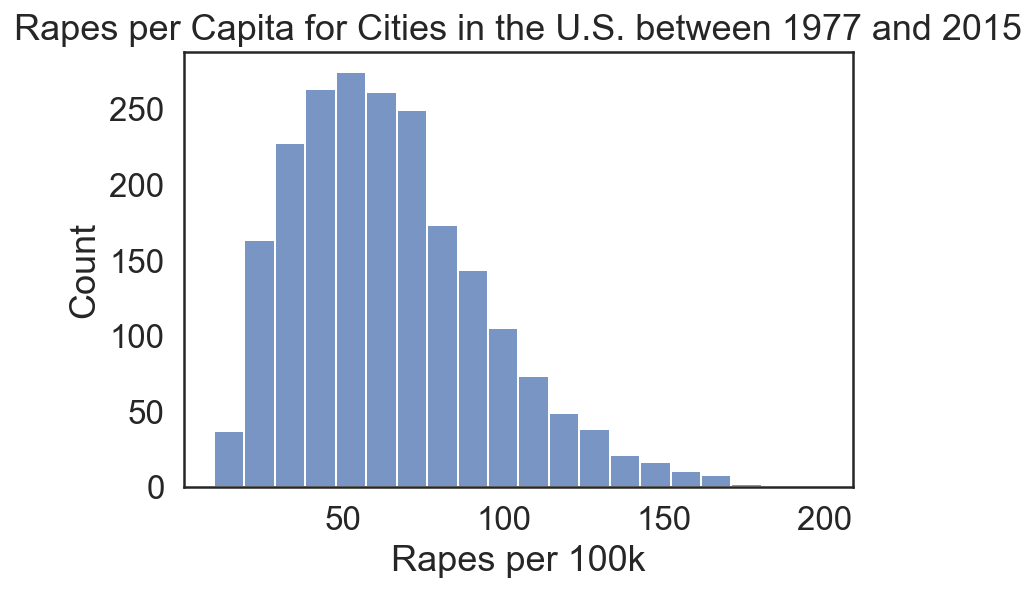

In [32]:
# Find distribution of rapes per capita from our entire merged_df dataset
sns.histplot(data=merged_df, x='rapes_percapita', bins=20, kde=False);
plt.title('Rapes per Capita for Cities in the U.S. between 1977 and 2015');
plt.xlabel('Rapes per 100k');

For all of our years and cities, this variable shows a skewed right distribution. The mean for this variable is larger than the mode and more datapoints falls to the right of the peak. This distribution shows that, while there are cities that exist with relatively high numbers of rapes per capita, they are not as common. The few cities and years with higher rapes per capita drive the skewedness and thus contribute to the mean being higher than the mode. Moreover, our data for this variable may not show a normal distribution as our data only accounts for cities with populations over 250,000 and is not an exhaustive list of all of the cities in the United States.

In [33]:
# Find the data points that had the most extreme values of rapes per capita out of our merged_df dataset
merged_df[merged_df['rapes_percapita'] > 160]

,year,city_name,crime_population,violent_crimes,rapes,crimes_percapita,rapes_percapita,fiscal_population,spending_direct_city,spending_general_city,transportation_city,public_safety_city,envir_housing_city,trans_safety_envir_spending,prop_spending,prop_transportation,prop_safety,prop_envir
596,1988,"Atlanta, GA",444995.0,15911.0,721.0,3575.55,162.02,413548,2677.72,2261.82,404.05,467.66,585.25,1456.96,0.644154,0.178639,0.206763,0.258752
628,1988,"Orlando, FL",155673.0,3587.0,289.0,2304.19,185.65,151237,9288.93,5169.40,1565.01,579.12,1990.16,4134.29,0.799762,0.302745,0.112028,0.384989
649,1989,"Atlanta, GA",426482.0,16852.0,691.0,3951.40,162.02,408355,3194.88,2536.73,469.36,527.23,635.14,1631.73,0.643241,0.185026,0.207838,0.250377
703,1990,"Atlanta, GA",394017.0,16097.0,695.0,4085.36,176.39,401339,3309.57,2568.59,521.39,563.30,640.46,1725.15,0.671633,0.202987,0.219303,0.249343
712,1990,"Cleveland, OH",505616.0,9190.0,846.0,1817.58,167.32,511037,2591.57,1832.57,281.71,641.66,416.93,1340.30,0.731377,0.153724,0.350142,0.227511
716,1990,"Detroit, MI",1027974.0,27747.0,1657.0,2699.19,161.19,1041375,3408.64,2530.69,263.30,687.45,631.84,1582.59,0.625359,0.104043,0.271645,0.249671
730,1990,"Minneapolis, MN",368383.0,4695.0,615.0,1274.49,166.95,369669,3516.01,3035.24,279.96,438.99,1132.52,1851.47,0.609991,0.092237,0.144631,0.373124
757,1991,"Atlanta, GA",403085.0,16327.0,676.0,4050.51,167.71,394575,3147.05,2452.01,498.58,596.75,613.90,1709.23,0.697073,0.203335,0.243372,0.250366
766,1991,"Cleveland, OH",509898.0,9341.0,913.0,1831.94,179.06,505074,2749.08,1986.00,351.84,661.05,552.70,1565.59,0.788313,0.177160,0.332855,0.278298
784,1991,"Minneapolis, MN",373303.0,5889.0,744.0,1577.54,199.30,369569,3831.11,3300.33,378.17,436.49,1208.59,2023.25,0.613045,0.114586,0.132256,0.366203


There are only a few cities, Atalnta, Orlando, Cleveland, Detroit, and Minneapolis, that have extreme values for rapes per capita. Interestingly, for all of these cities, the higher rates of rape occurred during the late 80s and 90s. There may be another factor that is driving higher rates of rapes during this time period for these cities.

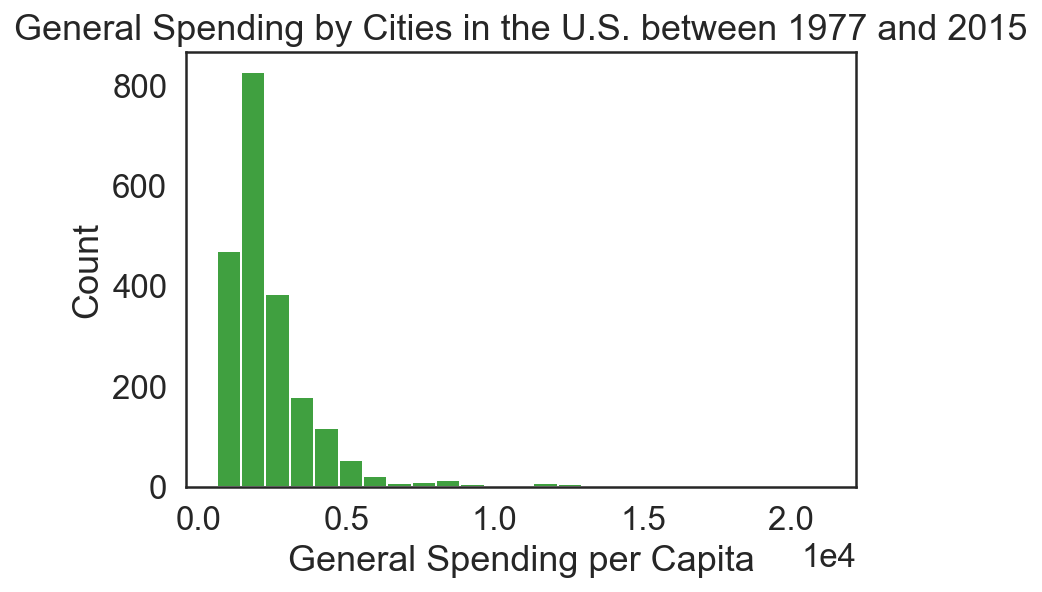

In [34]:
# Find distribution of general spending for our entire merged dataset
sns.histplot(data=merged_df, x='spending_general_city', bins=25, kde=False, color='green')
plt.title('General Spending by Cities in the U.S. between 1977 and 2015')
plt.xlabel('General Spending per Capita')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

The skewedness of this variable for all of the years and all of the cities in our dataset appears to be more extreme than the distribution of rapes per capita. Again, we can see that most of the data falls to the right of the peak. There seems to be very few datapoints that are extreme, but their existence in our data seems to be driving the skewedness for this variable, making the mean greater than the mode. The skewedness of our data may be due to our data not accounting for cities with populations under 250,000. Furthermore, some of these extreme datapoints may signify that some cities during some years had a relatively high budget for their population size, leading to a higher spending per capita rate.

In [35]:
# Find the city and years that have the most extreme value for general spending per capita in our merged_df dataset
merged_df[merged_df['spending_general_city'] > 15000]

,year,city_name,crime_population,violent_crimes,rapes,crimes_percapita,rapes_percapita,fiscal_population,spending_direct_city,spending_general_city,transportation_city,public_safety_city,envir_housing_city,trans_safety_envir_spending,prop_spending,prop_transportation,prop_safety,prop_envir
1509,2004,"Washington, DC",553523.0,7336.0,218.0,1325.33,39.38,568502,15651.15,15229.19,176.14,1844.32,1658.40,3678.86,0.241566,0.011566,0.121104,0.108896
1564,2005,"Washington, DC",550521.0,7716.0,165.0,1401.58,29.97,567754,15973.66,15547.43,187.41,1857.31,2331.74,4376.46,0.281491,0.012054,0.119461,0.149976
1619,2006,"Washington, DC",581530.0,8408.0,182.0,1445.84,31.30,567136,17584.33,17158.93,218.18,2053.65,2992.10,5263.93,0.306775,0.012715,0.119684,0.174376
1674,2007,"Washington, DC",588292.0,7924.0,192.0,1346.95,32.64,570681,18002.25,17567.75,216.62,2048.56,2818.50,5083.68,0.289376,0.012331,0.116609,0.160436
1729,2008,"Washington, DC",591833.0,8135.0,186.0,1374.54,31.43,574404,21657.81,21162.14,824.09,2312.49,3512.62,6649.20,0.314203,0.038942,0.109275,0.165986
1784,2009,"Washington, DC",599657.0,7587.0,150.0,1265.22,25.01,580236,20465.96,19940.90,843.74,2248.42,2445.01,5537.17,0.277679,0.042312,0.112754,0.122613
1839,2010,"Washington, DC",601723.0,7468.0,184.0,1241.10,30.58,592228,20938.75,20453.40,1119.46,2181.95,2715.89,6017.30,0.294196,0.054732,0.106679,0.132784
1894,2011,"Washington, DC",617996.0,6985.0,172.0,1130.27,27.83,605085,19743.97,19214.56,1008.70,2065.56,2602.14,5676.40,0.295422,0.052497,0.107500,0.135425
1949,2012,"Washington, DC",632323.0,7448.0,236.0,1177.88,37.32,619602,19140.33,18549.04,945.10,1894.53,2400.96,5240.59,0.282526,0.050951,0.102136,0.129439
2004,2013,"Washington, DC",646449.0,7880.0,393.0,1218.97,60.79,634725,19865.02,19158.09,1108.78,1848.24,2453.54,5410.56,0.282416,0.057875,0.096473,0.128068


From restricting the data, we see that Washington, DC between the period of 2004 to 2015 is the only city that has this extreme of a value for general spending per capita. However, up until 2013, their rapes per capita is actually lower than the median for this variable, which is 60.39 (see output for merged_df.describe() above). From this dataframe, we can also see that Washington, DC spends a relatively low proportion of their general spending budget on the three categories of interest: transportation, safety, and environment & housing.

In [36]:
# Find the cities and years that have low values for general spending per capita, 
# then find the min and max values for the rapes per capita 
low_gen_spending_df = merged_df[merged_df['spending_general_city'] < 1000]
low_gen_spending_df

,year,city_name,crime_population,violent_crimes,rapes,crimes_percapita,rapes_percapita,fiscal_population,spending_direct_city,spending_general_city,transportation_city,public_safety_city,envir_housing_city,trans_safety_envir_spending,prop_spending,prop_transportation,prop_safety,prop_envir
1,1977,"Arlington, TX",112994.0,389.0,34.0,344.27,30.09,126561,951.16,682.70,104.25,147.94,127.68,379.87,0.556423,0.152703,0.216698,0.187022
16,1977,"El Paso, TX",386000.0,1560.0,107.0,404.15,27.72,392070,825.44,720.13,81.86,175.20,209.16,466.22,0.647411,0.113674,0.243289,0.290448
22,1977,"Las Vegas, NV",279791.0,2729.0,183.0,975.37,65.41,146865,624.50,624.50,73.15,199.51,149.44,422.10,0.675901,0.117134,0.319472,0.239295
26,1977,"Mesa, AZ",116400.0,385.0,34.0,330.76,29.21,110794,1423.34,984.11,220.22,249.50,171.77,641.49,0.651848,0.223776,0.253529,0.174543
43,1977,"San Diego, CA",788621.0,4414.0,298.0,559.71,37.79,801053,1231.80,922.05,80.83,267.17,299.64,647.64,0.702391,0.087663,0.289757,0.324972
55,1978,"Arlington, TX",121750.0,450.0,43.0,369.61,35.32,133424,939.62,743.23,124.46,154.89,166.92,446.27,0.600447,0.167458,0.208401,0.224587
57,1978,"Aurora, CO",131499.0,831.0,83.0,631.94,63.12,125426,1707.22,949.72,158.59,254.60,253.94,667.13,0.702449,0.166986,0.268079,0.267384
70,1978,"El Paso, TX",399000.0,1490.0,121.0,373.43,30.33,400221,862.66,698.74,106.75,204.46,148.11,459.32,0.657355,0.152775,0.292612,0.211967
76,1978,"Las Vegas, NV",288865.0,2886.0,192.0,999.08,66.47,150931,869.64,869.64,141.81,207.91,186.44,536.16,0.616531,0.163067,0.239076,0.214388
80,1978,"Mesa, AZ",124937.0,493.0,40.0,394.60,32.02,119901,1260.98,810.81,208.70,261.75,197.41,667.86,0.823695,0.257397,0.322825,0.243473


In [37]:
low_gen_spending_df.describe()

,year,crime_population,violent_crimes,rapes,crimes_percapita,rapes_percapita,fiscal_population,spending_direct_city,spending_general_city,transportation_city,public_safety_city,envir_housing_city,trans_safety_envir_spending,prop_spending,prop_transportation,prop_safety,prop_envir
count,86.000000,86.000000,86.000000,86.000000,86.00000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,1987.139535,470765.313953,3430.220930,224.697674,734.79314,48.213605,431055.872093,1234.541860,880.959767,131.635581,242.169186,243.436163,617.240930,0.698300,0.149806,0.274473,0.274022
std,9.006093,227113.124663,1658.934792,115.842496,259.02382,13.374904,238665.932110,515.484872,94.262919,49.362140,46.555988,75.162160,97.221468,0.061440,0.054287,0.040839,0.070673
min,1977.000000,112994.000000,385.000000,34.000000,327.05000,25.890000,110794.000000,618.750000,618.750000,68.660000,147.940000,127.680000,379.870000,0.545772,0.073609,0.171204,0.144949
25%,1980.000000,299845.750000,2420.500000,158.500000,536.46250,37.872500,187929.250000,992.747500,842.597500,98.170000,202.435000,185.975000,537.962500,0.658199,0.114552,0.249257,0.223190
50%,1984.000000,460793.500000,3696.000000,213.000000,755.40000,46.440000,414093.500000,1134.460000,905.030000,117.960000,251.175000,228.500000,640.385000,0.701499,0.141124,0.279326,0.256754
75%,1993.000000,610813.750000,4638.000000,289.750000,879.71500,59.272500,578705.250000,1266.717500,955.602500,153.655000,277.960000,289.802500,687.652500,0.730389,0.175522,0.299551,0.315204
max,2013.000000,952933.000000,6594.000000,559.000000,1360.65000,77.990000,933692.000000,3139.270000,999.860000,307.360000,345.500000,423.700000,788.950000,0.841253,0.368023,0.367616,0.454238


When restricting the dataframe to cities and years that have low values for general spending per capita, we see that the median for rapes per capita is actually lower than the median for the entire dataset, as seen with Washington, DC above. Interestingly, we can also see that the median value for the proportion of spending on the three categories combined is actually higher than Washington, DC. Although these are just a few of the points in our dataset, this might begin to indicate to us that a higher proportion of general spending on these three categories may not show a significant relationship with a lower rate of rapes per capita.

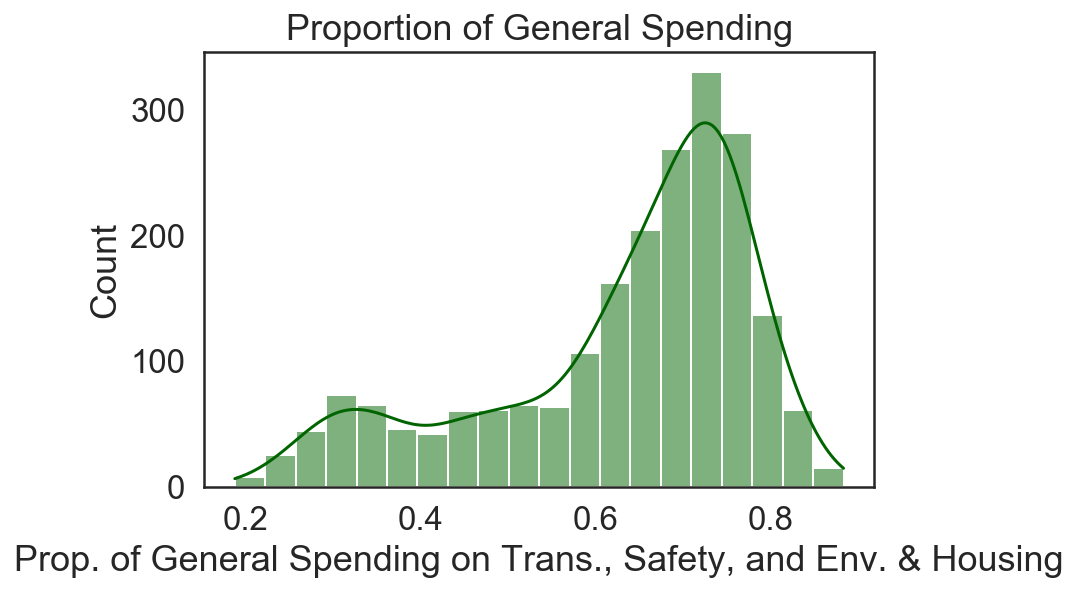

In [38]:
# Find the distribution for the proportion of general spending on
# transportation, safety, and environment & housing combined
# Find distribution of rapes per capita from our entire merged_df dataset
sns.histplot(data=merged_df, x='prop_spending', bins=20, kde=True, color='darkgreen');
plt.title('Proportion of General Spending')
plt.xlabel('Prop. of General Spending on Trans., Safety, and Env. & Housing');

The distribution for our prop_spending variable, the proportion of general spending on transportation, safety, and environment & housing shows a left skewed and slightly bimodal distribution. We can see that the mode for the proportion of spending is actually quite high and that most of the cities and years in our dataset fall to the left of the peak due to it being left skewed. However, it also seems like there are a lot of cities and years that spend larger proportions, about 60% to 80% of their budget, on these three categories. 

**Exploring cities in the top 5 and Bottom 5 crime rates**

We decided to look at a subset of cities that were either in the top five or bottom five in crime rates for 2015 to see if their spending habits were different, and if those habits could be the reason that they have said rankings. We also did this to reduce the scale of observations and time dimension to look at differences in spending habits between these cities. 

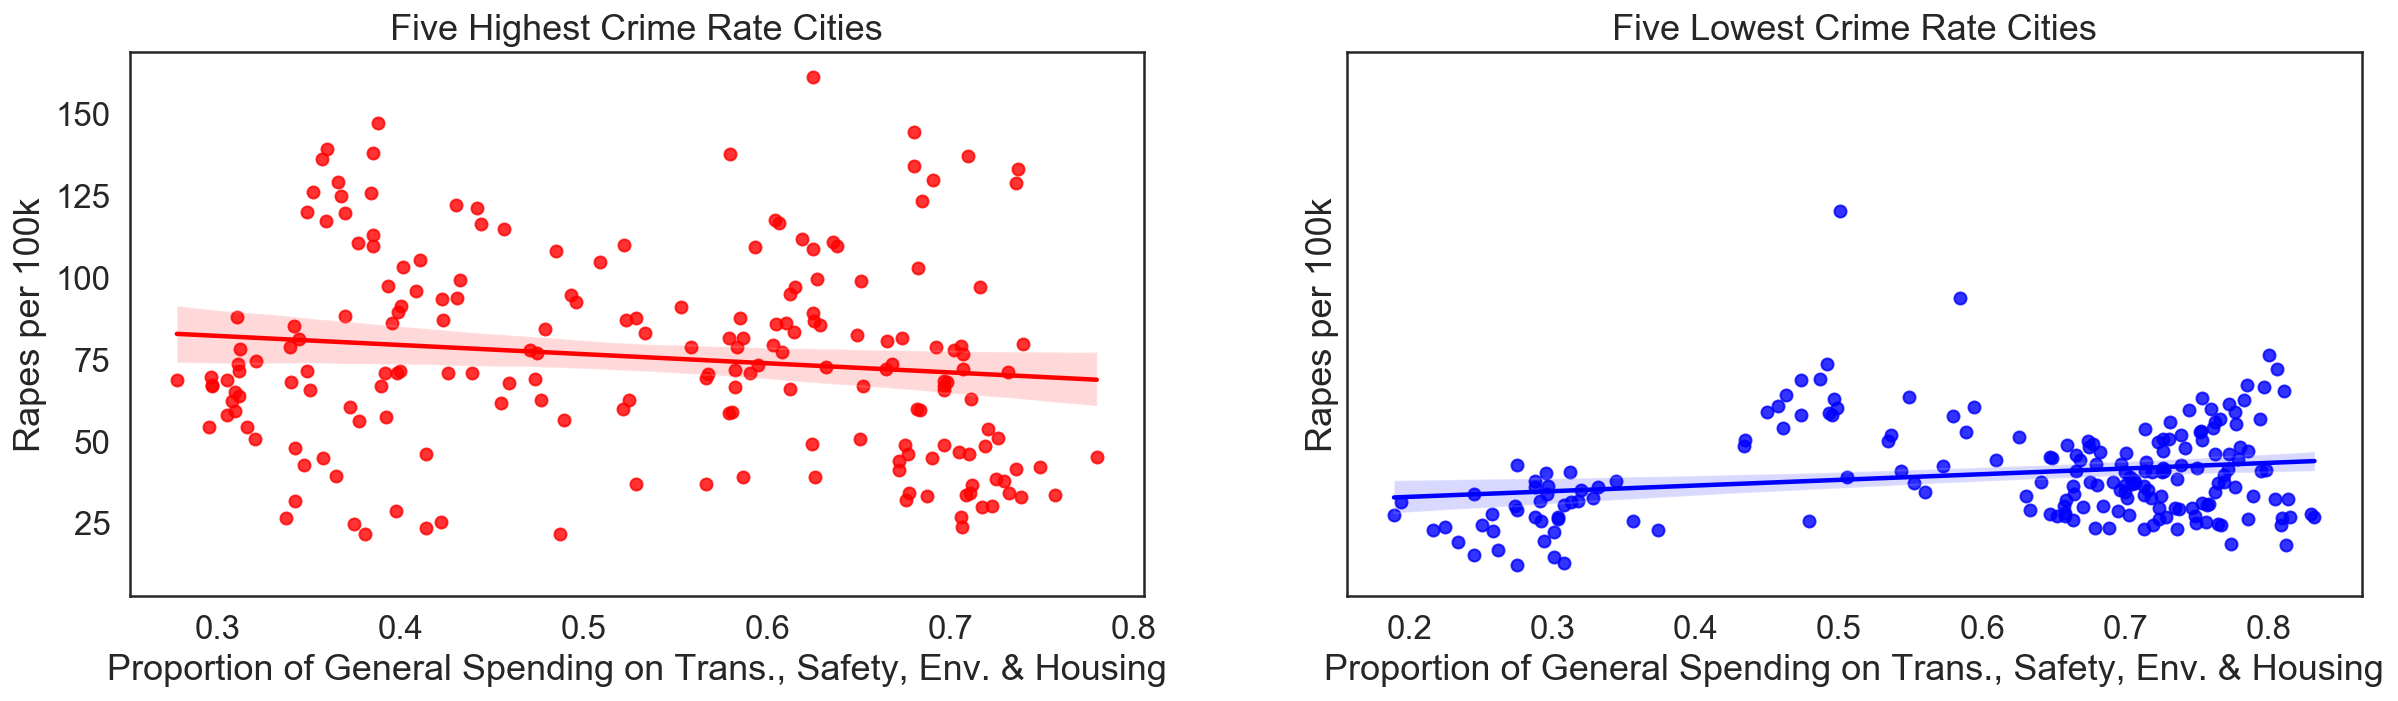

In [39]:
# Find relationship between proportion of spending and rapes per capita
top_df=ranked_df[ranked_df['crime_ranking']=='Top 5']
bot_df=ranked_df[ranked_df['crime_ranking']=='Bottom 5']

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

sns.regplot(ax=axes[0], x='prop_spending', y='rapes_percapita', 
           data=top_df, fit_reg=True, scatter_kws={"color": "red"}, line_kws={"color": "red"});
axes[0].set_title('Five Highest Crime Rate Cities');
axes[0].set_xlabel('Proportion of General Spending on Trans., Safety, Env. & Housing')
axes[0].set_ylabel('Rapes per 100k')

sns.regplot(ax=axes[1], x='prop_spending', y='rapes_percapita', 
           data=bot_df, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "blue"});
axes[1].set_title('Five Lowest Crime Rate Cities');
axes[1].set_xlabel('Proportion of General Spending on Trans., Safety, Env. & Housing')
axes[1].set_ylabel('Rapes per 100k');

In the scatterplots above, we see the relationship between the proportion of general spending on transportation, safety, and environment & housing for the five cities with the highest violent crime rates and the five cities with the lowest crime rates. For both scatterplots, there seems to be a weak linear relationship for these two variables as the slope of the regression lines are not steep. Additionally, the points for the scatterplot of the five highest crime rate cities fall much further away from the regression line than the scatterplot showing the relationship for the five lowest crime rate cities. While the linear relationship appears to be weak for the five lowest crime rate cities, there actually seems to be a weak positive relationship indicating that, for these cities, a higher proportion of spending may be related to higher rates of rapes per capita. We can begin to see that there may not be a significant relationship between proportion of general spending on these three categories and rapes per capita. 

**Restricting the Time dimension**

Due to separate years adding in higher variability, we decided to look at more recent years (1995-2015) and take the average of their rates to help eliminate the variability and mitigate the time factor while still showing how a city performed on average over a period of time.

In [40]:
#Restricting dataset points to include observations for 1995 and after
#Grouping each observation by mean so that there is one observation per city
restrict_years_df = merged_df[merged_df['year'] >= 1995]
restrict_years_df = restrict_years_df.groupby('city_name').mean()

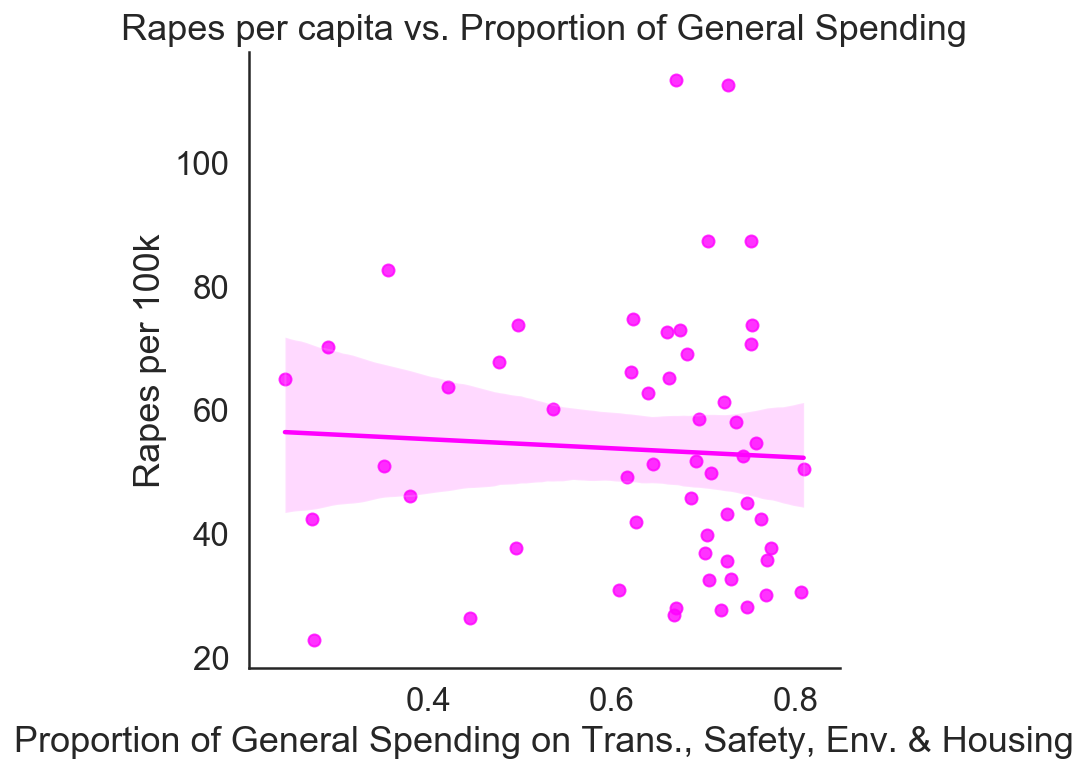

In [41]:
#scatter plot for prop_spending
sns.lmplot(x='prop_spending', y='rapes_percapita', 
           data=restrict_years_df, fit_reg=True, scatter_kws={"color": "magenta"}, line_kws={"color": "magenta"});
plt.title('Rapes per capita vs. Proportion of General Spending')
plt.xlabel('Proportion of General Spending on Trans., Safety, Env. & Housing')
plt.ylabel('Rapes per 100k');

In the scatterplot above, we wanted to see if the average proportion of general spending on the three categories above showed a strong linear relationship with average rapes per capita. Each point represents the average value of each of our cities, taking into account only the data between 1995 and 2015. The slope of the regression line is somewhat negative, but not very steep, and most of the points tend to fall far from the regression line. In an attempt to begin to answer our research question, it seems that the proportion of general spending on these three categories does not show a significant relationship with rapes per capita even when we grouped the variables by mean to discount the time factor. 

In [42]:
#OLS report to summarize regression statistics on rapes_percapita vs. prop_spending
outcome, predictors = patsy.dmatrices("rapes_percapita ~ prop_spending", restrict_years_df)

mod_log = sm.OLS(outcome, predictors)

res_log = mod_log.fit()

print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:        rapes_percapita   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.1528
Date:                Wed, 09 Jun 2021   Prob (F-statistic):              0.697
Time:                        18:14:26   Log-Likelihood:                -244.13
No. Observations:                  55   AIC:                             492.3
Df Residuals:                      53   BIC:                             496.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        58.1397     12.163      4.780

**Interpreting Regression Results for prop_spending**

For prop_spending, the OLS report indicates that the data are skewed to the right (i.e. skew is high value, above 0.8) and contains a larger amount of outliers(i.e. Kurtosis is above 3). The effect size indicates a potential negative association between the predictor variable and the outcome variable, meaning that an increase in the proportion of spending is associated with a decrease in rapes per capita. However, the standard error value is quite large(18.76), indicating that the sample may not accurately reflect the true population. Furthermore, the p-value is significantly above the threshold 0.05, which indicates that these results are not statistically significant, and the r-squared value is very close to zero, indicating that this model does not fit the data well. If the linear model was a good fit, then R2 would be closer to 1.

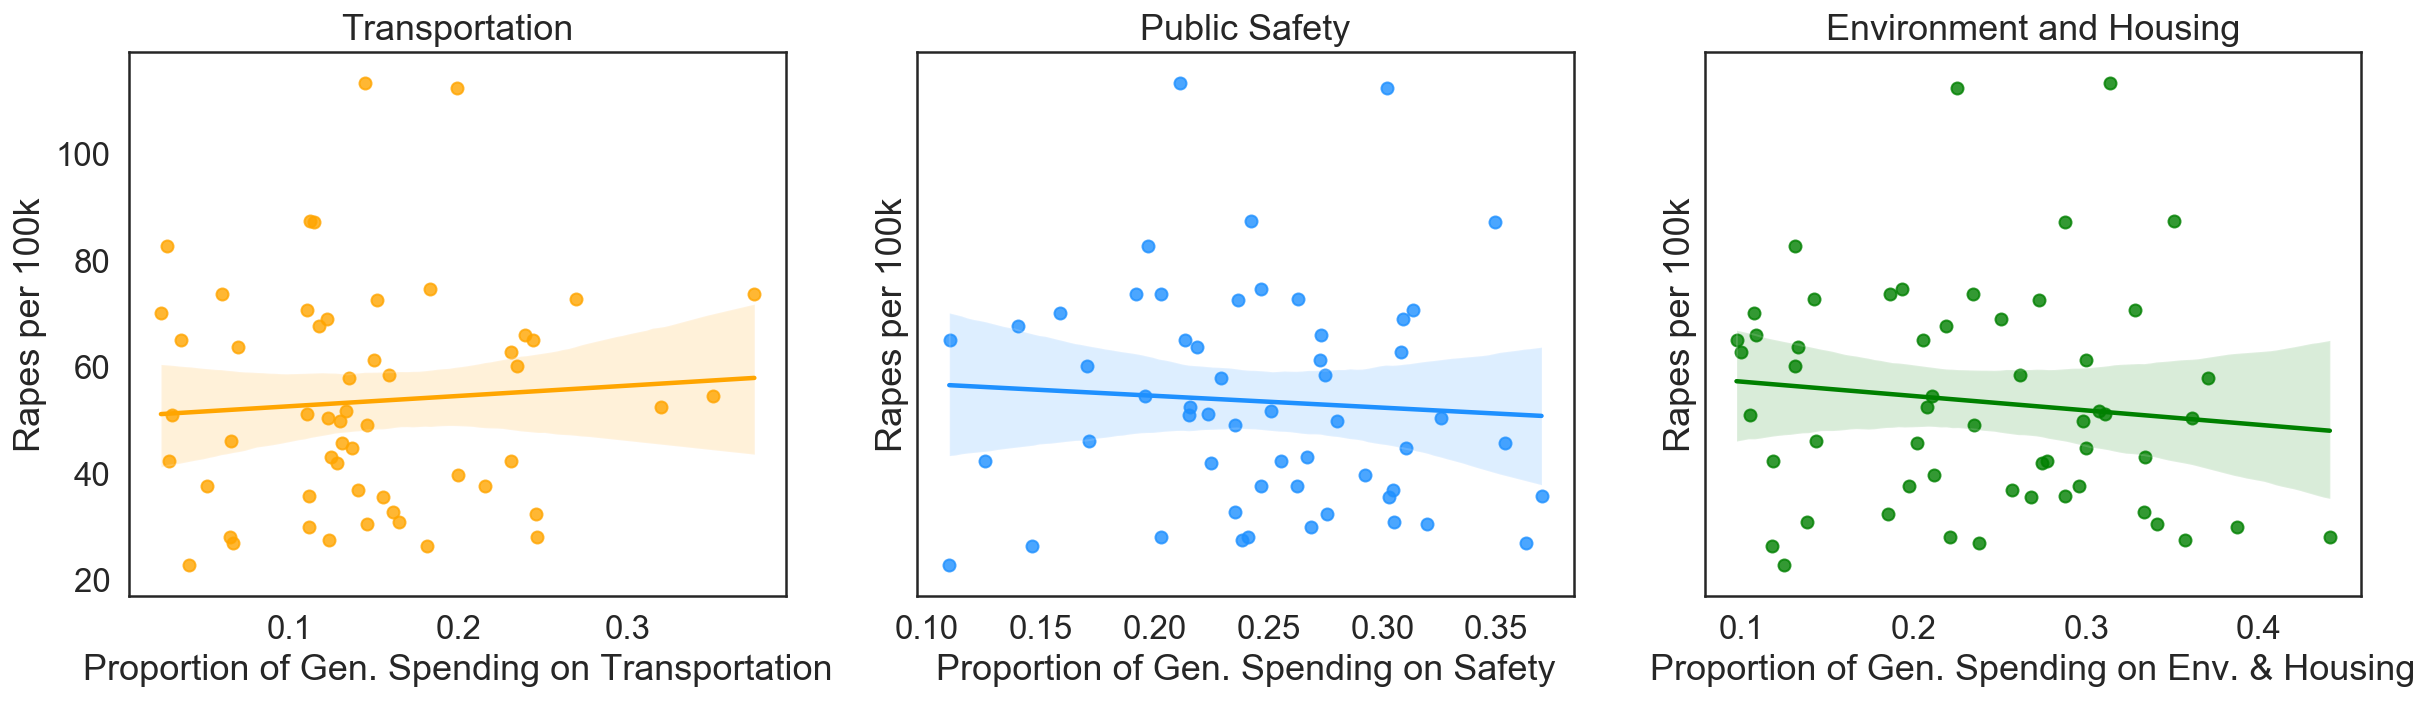

In [43]:
#scatterplots visualizing each predictor variable and the outcome variable, rapes per capita
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

sns.regplot(ax=axes[0], x='prop_transportation', y='rapes_percapita', 
           data=restrict_years_df, fit_reg=True, scatter_kws={"color": "orange"}, line_kws={"color": "orange"});
axes[0].set_title('Transportation');
axes[0].set_xlabel('Proportion of Gen. Spending on Transportation')
axes[0].set_ylabel('Rapes per 100k')

sns.regplot(ax=axes[1], x='prop_safety', y='rapes_percapita', 
           data=restrict_years_df, fit_reg=True, scatter_kws={"color": "dodgerblue"}, line_kws={"color": "dodgerblue"});
axes[1].set_title('Public Safety');
axes[1].set_xlabel('Proportion of Gen. Spending on Safety')
axes[1].set_ylabel('Rapes per 100k')

sns.regplot(ax=axes[2], x='prop_envir', y='rapes_percapita', 
           data=restrict_years_df, fit_reg=True, scatter_kws={"color": "green"}, line_kws={"color": "green"});
axes[2].set_title('Environment and Housing');
axes[2].set_xlabel('Proportion of Gen. Spending on Env. & Housing')
axes[2].set_ylabel('Rapes per 100k');

In the scatterplots above, we looked to see if the average proportion of general spending on any individual category may show a stronger relationship with average rapes per capita than when the three are combined. For the proportion of general spending on each category, the scatterplots show that there is still a weak linear relationship between the two variables with the points falling far from the regression line. While the linear relationship is weak for transportation, it appears as though a higher proportion of spending for this category may actually be positively related to rapes per capita. Overall, it seems like even the proportions of general spending on each individual category do not show a significant relationship with rapes per capita. 

In [44]:
#OLS report to summarize regression statistics on rapes_percapita vs. prop_transportation
outcome, predictors = patsy.dmatrices("rapes_percapita ~ prop_transportation", restrict_years_df)

mod_log = sm.OLS(outcome, predictors)

res_log = mod_log.fit()

print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:        rapes_percapita   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.2985
Date:                Wed, 09 Jun 2021   Prob (F-statistic):              0.587
Time:                        18:14:28   Log-Likelihood:                -244.05
No. Observations:                  55   AIC:                             492.1
Df Residuals:                      53   BIC:                             496.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              50.6556    

In [45]:
#OLS report to summarize regression statistics on rapes_percapita vs. prop_safety
outcome, predictors = patsy.dmatrices("rapes_percapita ~ prop_safety", restrict_years_df)

mod_log = sm.OLS(outcome, predictors)

res_log = mod_log.fit()

print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:        rapes_percapita   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.2388
Date:                Wed, 09 Jun 2021   Prob (F-statistic):              0.627
Time:                        18:14:28   Log-Likelihood:                -244.08
No. Observations:                  55   AIC:                             492.2
Df Residuals:                      53   BIC:                             496.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      58.9858     11.545      5.109      

In [46]:
#OLS report to summarize regression statistics on rapes_percapita vs. prop_envir
outcome, predictors = patsy.dmatrices("rapes_percapita ~ prop_envir", restrict_years_df)

mod_log = sm.OLS(outcome, predictors)

res_log = mod_log.fit()

print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:        rapes_percapita   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6947
Date:                Wed, 09 Jun 2021   Prob (F-statistic):              0.408
Time:                        18:14:28   Log-Likelihood:                -243.85
No. Observations:                  55   AIC:                             491.7
Df Residuals:                      53   BIC:                             495.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.9091      8.167      7.335      0.0

**Interpreting Regression results for prop_transportation, prop_safety, and prop_envir**

Similar to prop_spending, the OLS reports for these predictor variables indicate that the data are skewed to the right (i.e. skew is high value, above 0.8) and contains a larger amount of outliers(i.e. Kurtosis for all reports is above 3). For each predictor variable, the effect size indicates a potential negative association between the predictor variable and the outcome variable, meaning that an increase in the proportion of spending for any department is associated with a decrease in rapes per capita. However, the standard error values for each predictor variable is above 30, indicating that the sample may not accurately reflect the true population. Furthermore, the p-values for all the predictor variables are significantly above the threshold 0.05, which indicates that these results are not statistically significant, and the r-squared values for all the predictor variables are very close to zero, indicating that these models do not fit the data well.

## Random Forest Feature Importance

Although our chosen categories did not show strong effects on rapes per capita, we wanted to use a Random Forest Regression model to see if there exists a variable that did have a noticably larger effect for possible future research.

In [47]:
# See the columns to select a subset of interest to determine importance

restrict_years_df.columns

Index(['year', 'crime_population', 'violent_crimes', 'rapes',
       'crimes_percapita', 'rapes_percapita', 'fiscal_population',
       'spending_direct_city', 'spending_general_city', 'transportation_city',
       'public_safety_city', 'envir_housing_city',
       'trans_safety_envir_spending', 'prop_spending', 'prop_transportation',
       'prop_safety', 'prop_envir'],
      dtype='object')

In [48]:
# Choose the columns to create the model

rf_df = restrict_years_df
rf_X = rf_df[['spending_direct_city', 'spending_general_city', 'transportation_city',
       'public_safety_city', 'envir_housing_city',
       'trans_safety_envir_spending', 'prop_spending', 'prop_transportation',
       'prop_safety', 'prop_envir']].copy()

In [49]:
# Set x and y, use train_test_split() to split model

X = rf_X
y = rf_df['rapes_percapita']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [50]:
# Create the regressor and fit it using the training set

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

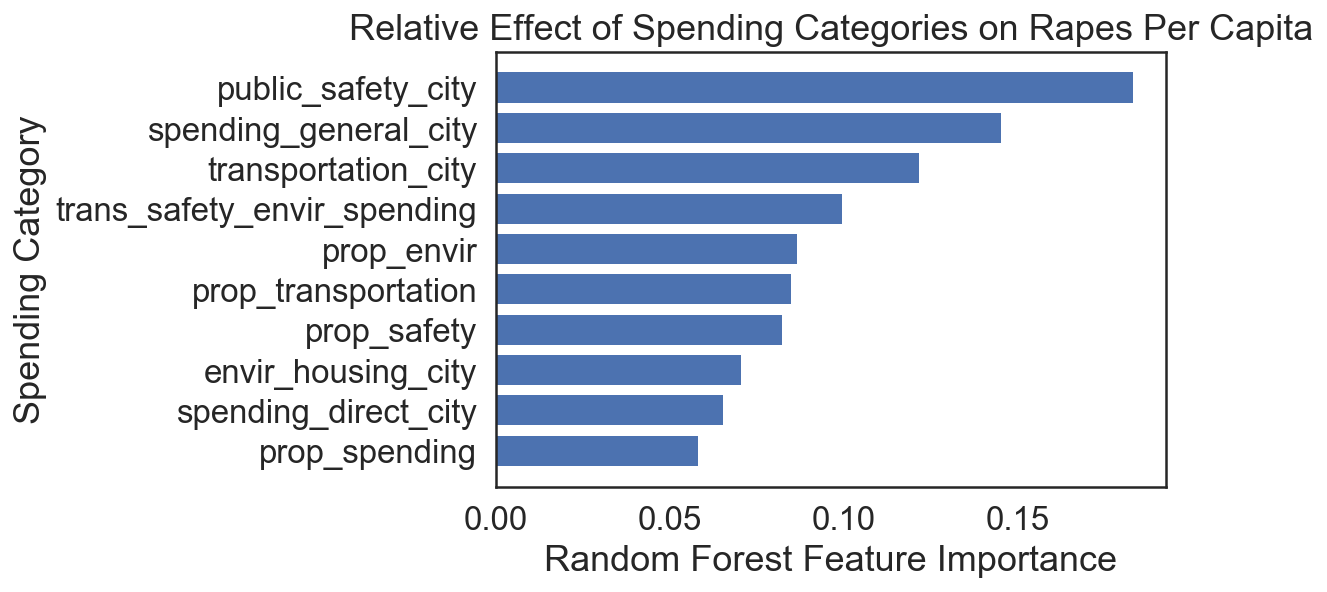

In [51]:
# Sort the features by importance and plot them

sorted_idx = rf.feature_importances_.argsort()

plt.barh(rf_X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance");
plt.ylabel("Spending Category");
plt.title("Relative Effect of Spending Categories on Rapes Per Capita");

In [52]:
# Print R^2 scores for the model for botht the test and training sets.

print('R^2 Train Score: {:.2f} \nR^2 Test Score: {:.2f}'.format(rf.score(X_train, y_train), rf.score(X_test, y_test)))

R^2 Train Score: 0.80 
R^2 Test Score: -0.37


These visuals both follow with our previous findings. No single category of spending, proportional or total, seems to have a strong effect("importance") on the outcome variable(rapes_percapita). Public safety and transportation spending appear to have the largest effect.

The R^2 score for this specific model is sufficient, but the test set score shows that it could not be used on other data sets. It is negative and therefor fits worse than a horizontal line would. We were only looking for importance in our current data for any variables to focus on, so it is okay for our purposes.

Text(0.5,1,'Correlation Matrix Between All Categories')

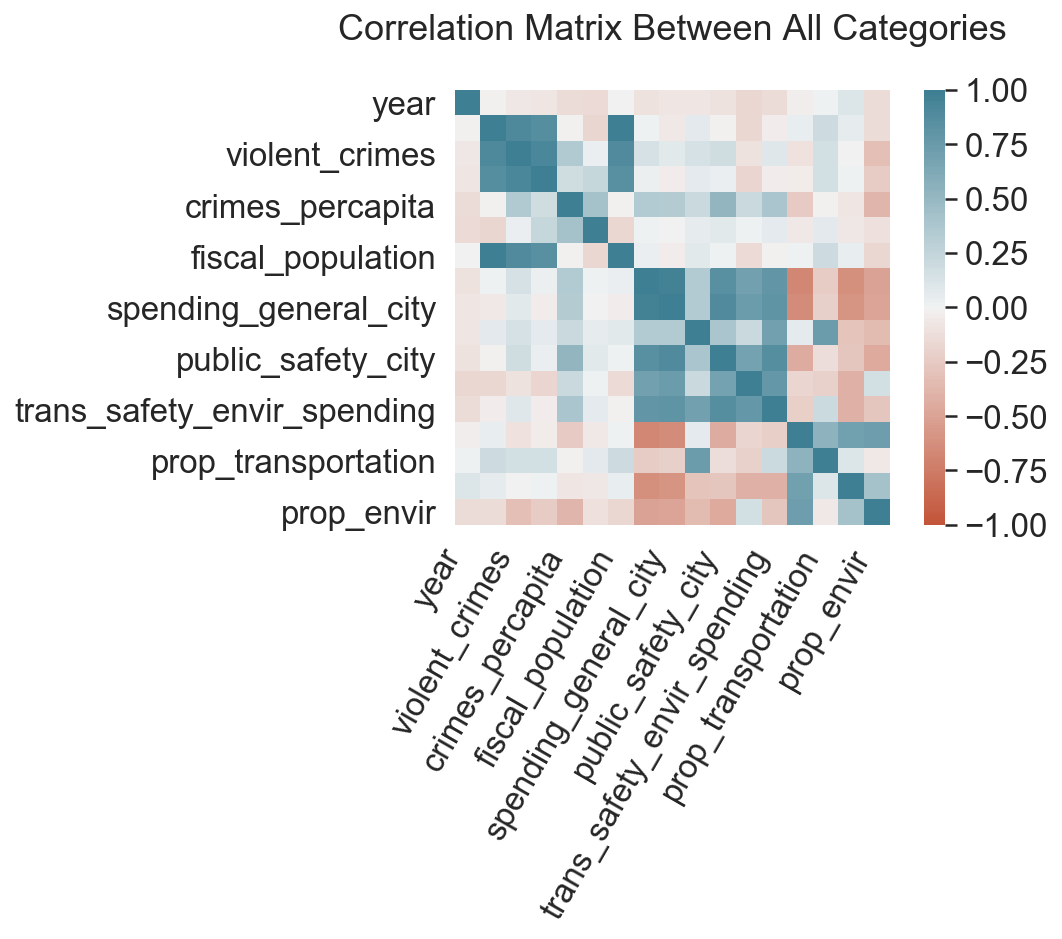

In [53]:
# Create a correlation matrix to visualize all relationships

ax = sns.heatmap(
    restrict_years_df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=60,
    horizontalalignment='right'
)
ax.set_title(
    'Correlation Matrix Between All Categories',
    pad=25
)

Checking for correlation across the entire dataframe ensures no spending category is heavily correlated with a crime or rape category. There is nothing showing correlation here aside from populations and spending categories with themselves, which disappears when looked at on a per capita/proportional basis.

# Ethics & Privacy

   The data we have analyzed revolves around sexual assault, which by nature can be a triggering and personal topic. While we did not anticipate any negative risks or potential harm in solving this question, the topic of discourse can make readers uncomfortable, and has the potential to scrutinize cities for how they allocate money, and for their spending decisions that could hypothetically contribute to higher crime rates. We believe that our findings are a productive analysis on the relationship between city spending for public infrastructure, community resources, and reported sexual assault. 

   Throughout our data collection we ensured that all data was anonymized and ethically obtained, such that none of the personal information from the reported sexual assaults can be identifiable. In finding our data, establishing anonymity was not an issue since the pre-existing datasets that we used took data from public, official government reports (the U.S. Census Bureau and the FBI’s Uniform Crime Reporting Program) which are already anonymized. Using data that is readily available to the public helped to mitigate any potential privacy risks surrounding our data. Throughout our analyses we upheld all usage agreements outlined by our data sources.
    
   We also prioritized the identification and minimization of bias within our datasets. We anticipated negligible bias since the spending reports and reported sexual assault data is taken directly from government disclosure. However, a potential bias we considered is that there will be fewer reports of sexual assault than what has actually occurred, since historically, sexual assault cases are underreported due to factors including, but not limited to, victim blaming and societal stigma. This means that our findings might not be completely representative of the population, which we keep in mind during our analyses and conclusions. It is important to acknowledge that our datasets are drawn from the U.S. Census Bureau data, which is subject to nonresponse bias, a phenomenon where not all participants respond to the Census, leading to a marginally inaccurate estimate of population. Likewise, there is null data found in the UCR, since agencies report their data to the UCR on a voluntary basis. This means there are some cities that do not report rape cases in certain years, so we cannot analyze those cities. 


# Conclusion & Discussion

In this study, we explored whether cities’ spending on public transportation, public safety, environment and housing impacted rapes per capita reported for each city in our datasets. We hypothesized that high rates of reported sexual assault cases would be associated with less spending by cities on public safety, housing, and public transportation. This hypothesis follows from previous research that suggests that community engagement and investing in public safety and transportation may prevent sexual violence. To explore this question, we analyzed departmental spending and crime data from 55 cities. 

Through our data analysis, we found the data to be skewed, where the cities in the dataset reported a median of approximately 60 rapes per capita across 39 years with a majority of the extreme values for rapes per capita reporting higher than the median rapes per capita in the dataset. Additionally, cities in the dataset reported a median of 0.68 as the proportion of general spending on public transportation, public safety, environment, housing, and infrastructure across 39 years. We performed a regression analysis to observe whether the proportion of general budget spending on public transportation, public safety, environment, housing, and infrastructure could explain rapes per capita reported by cities. Our analyses showed no statistically significant relationship between the predictor variables, namely the proportion of general budget spending on public transportation, public safety, environment, housing, and infrastructure, and the outcome variable, namely rapes per capita reported for each city. We confirmed that none of the variables in this dataset showed a strong correlation to rapes rates by using a correlation matrix, as well as random forest regression and its feature importance method. The analyses also showed high standard errors, Kurtosis values, and skewness, indicating the presence of a large amount of outliers and extreme values in our data. This could have resulted from not having a large enough sample size, as we could have overrepresented or underrepresented certain regions and cities whose spending and crime data has not been made available to the public. Subcommunities of cities can be vastly different from each other in regards to crime rates, poverty rates, education, etc., and future research may need to look at rape rates within communities on a smaller scale. 

In our exploratory data analysis, we noticed that several cities with high amounts of spending also had high rapes per capita, suggesting that other confounding factors may have contributed to this result and funding may not accurately predict or reduce instances of sexual violence. Potential confounding variables that can affect crime are poverty rates, education levels, and employment rates. Future research should seek to understand the relationship between these variables and rates of sexual violence. Additionally, the majority of rape cases go unreported, which also impacts how researchers can effectively study the factors that impact or reduce rates of sexual violence[(U.S. Department of Justice, 2013; Federal Bureau of Investigation, 2017; U.S. Department of Justice, 2020)](https://www.rainn.org/statistics/criminal-justice-system). Furthermore, cities can define their spending categories differently, and the specifics about what the spending goes toward is unclear. For example, public transportation investment does not necessarily go towards planning safety improvements for public transportation areas, which may reduce commuter anxiety about violence or sexual assault in public spaces[(Allen et al., 2018)](https://scioteca.caf.com/bitstream/handle/123456789/1407/Ella%20se%20mueve%20segura%20%E2%80%93%20A%20study%20on%20womens%20personal%20safety.pdf?sequence=5&isAllowed=y); [(Gekoski et al., 2017)](https://www.emerald.com/insight/content/doi/10.1108/JCRPP-08-2016-0016/full/html?utm_source=miragenews&utm_medium=miragenews&utm_campaign=news). Also, spending in departments such as public safety does not necessarily translate to safety for vulnerable communities, such as populations who are more likely to experience sexual violence like Indigenous communities, transgender individuals, inmates, and military members[(Cantor et al., 2015; U.S. Department of Justice, 2004)](https://www.rainn.org/statistics/victims-sexual-violence). Future research could study the predictors of sexual violence rates in areas with more transparency in spending data from city spending and planning departments. Although we did not find any statistically significant results, this introductory study could lead the way to more in-depth research. That could include cities looking internally at their spending patterns, or on a more national scale as we have attempted here. 


# Team Contributions

Everyone contributed to the question, hypothesis, the process of data gathering, initial stages of exploratory data analysis, and overall editing of the final project. Everyone also worked on the slides, writing the script, and presenting the project for the video. 
- Harshini researched and wrote the background for the project proposal, the description of the crime dataset, and answered the questions regarding how “clean” the data is. For the EDA checkpoint, she contributed to labeling and interpreting the plots. She wrote the code and written interpretations of the OLS reports, the discussion and the conclusion for the final project. 
- Jennifer wrote the data section for the project proposal. She contributed to writing the code for the data cleaning. She worked on the visualizations for the EDA as well as the interpretations of them and the outputs of the code for the EDA. Jennifer also wrote the overview. For the video, she helped work on the slides as well as write the script and present. 
- Christina found and provided the datasets we used in this project, researched for the background, added code commentary for cleaning, worked on the random forest analysis portion, wrote the ethics and privacy section, and constructed much of the slides for the presentation. 
- Kyle worked on background research, discussion and conclusion section, data cleaning, analysis of visualizations and reports, created the ranking dataframe and plots, used and plotted feature importances using random forest regression, and created a correlation matrix. 
